## 6 Improving a Model

First prediction = baseline prediction
First Model = baseline model.

from a data perspective.
* could we collect more data? (generally, the more data, the better)
* could we improve our data?

From model perspective.
* is there a better model we could use?
* could we improve the current model?

Parameters vs hyperparameters
* parameters = model find these patterns in data.\
* hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyperperameters.
1. by hand
2. Random with RandomSearchCV
3. Exhaustivily with GridSearchCV

In [2]:
what_were_covered = [ 
    '1. end-to-end sklearn workflow',
    '2. Getting the data ready',
    '3. Choose the right estimator/algorithem for our problems',
    '4. fit he model/algorithem and use it to make predictions',
    '5. Evaluating the model',
    '6. Improve the model',
    '7. save and load a train model',
    '8. putting it all together']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()

In [5]:
heart_disease = pd.read_csv('heart-disease.csv')

In [6]:
from sklearn.model_selection import train_test_split

<img src='parameters vs hyperparameters.png'>

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [9]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 6.1 Tuning hyperperameters by hands

let's make three sets, training, validation, testing

<img src='tuning hyperperameters.png'>

In [10]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we are going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

<img src='ML concept.png'>

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    '''
    preforms evaluation comparison on y_true labels vs y_preds labels on a classification.
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy, 2),
                   'precision': round(precision, 2),
                   'recall': round(recall, 2),
                   'f1': round(f1, 2)}
    
    print(f'Acc: {accuracy * 100:.2f}%')
    print(f'Precision : {precision:.2f}')
    print(f'Recall : {recall:.2f}')
    print(f'F1 score : {f1:.2f}')
    
    return metric_dict

In [17]:

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split the data into train, validate, test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evluate the classifier on the classification set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision : 0.81
Recall : 0.88
F1 score : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [18]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
np.random.seed(42)

# create a second classifier with different hyperperameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with hyperperamters
y_preds_2 = clf.predict(X_valid)

# Evaluate the second classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision : 0.81
Recall : 0.88
F1 score : 0.85


In [20]:
np.random.seed(42)

# create a second classifier with different hyperperameters
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_3.fit(X_train, y_train)

# Make predictions with hyperperamters
y_preds_3 = clf.predict(X_valid)

# Evaluate the second classifier
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc: 82.22%
Precision : 0.81
Recall : 0.88
F1 score : 0.85


### 6.2 Hyperperameter tuning with RandomSearchCV

In [21]:
clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [22]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

np.random.seed(42)

# split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestXlassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions = grid,
                            n_iter = 10, # numbers of models to try
                            cv = 5,
                            verbose = 2)


In [23]:
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [24]:
# best result

rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [25]:
# now when we predict by default it will use the best result for us

# make predictions with the best hypermeraters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision : 0.77
Recall : 0.86
F1 score : 0.81


### 6.3 Hyperperameter tuning with GridSearchCV

**RandomizedSearchCV**
the key difference between RandomizedSearchCV and GridSearchCV is.
we determin the number of models, that how many times that model try by assinging the numbers to n_iter=10 or other number

**GridSearchCV**
the GridSearchCV try every single comnination that is availible.

In [26]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [27]:
6*5*2*3*3

540

In [28]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [29]:
3*1*2*1*2*5

60

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestXlassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid = grid_2,
                            cv = 5,
                            verbose = 2)

# fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   29.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [31]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [32]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision : 0.74
Recall : 0.82
F1 score : 0.78


Let's compare our different models metrics. 

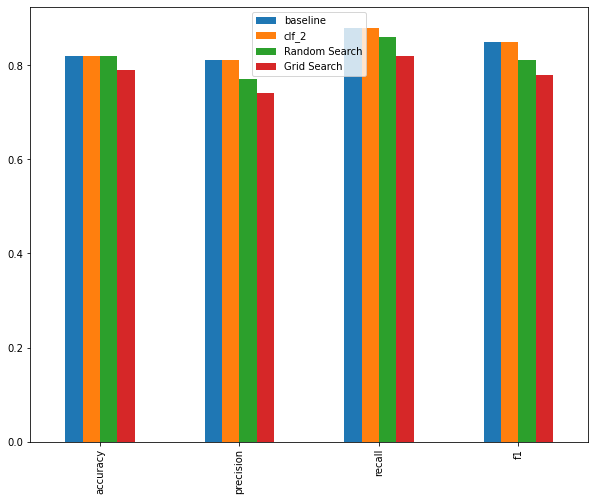

In [33]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                                'clf_2': clf_2_metrics,
                                'Random Search': rs_metrics,
                                'Grid Search': gs_metrics}) 

compare_metrics.plot.bar(figsize=(10,8));

In [34]:
what_were_covered

['1. end-to-end sklearn workflow',
 '2. Getting the data ready',
 '3. Choose the right estimator/algorithem for our problems',
 '4. fit he model/algorithem and use it to make predictions',
 '5. Evaluating the model',
 '6. Improve the model',
 '7. save and load a train model',
 '8. putting it all together']

## 7 Saving and loading machine learning models

Two ways to save and load Machine learning models:
1. With python's `pickle` module.
2. with the `joblib` module.

**7.1 Pickle**

In [35]:
import pickle

# save an existing model to file.
pickle.dump(gs_clf, open('gs_random_forest_classifier_model_1.pk1', 'wb'))

In [36]:
# Load and Save
load_pickle_model = pickle.load(open('gs_random_forest_classifier_model_1.pk1', 'rb'))

In [37]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# # split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
# Make some predictions
pickle_y_preds = load_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision : 0.74
Recall : 0.82
F1 score : 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**7.2 Joblib**

In [39]:
from joblib import dump, load

# save model to file
dump(gs_clf, filename='gs_random_forest_classifier_model_1.joblib')

['gs_random_forest_classifier_model_1.joblib']

In [40]:
# import the saved joblib model

load_joblib_model = load('gs_random_forest_classifier_model_1.joblib')

In [41]:
# make and Evaluate joblin predictions

joblib_y_preds = load_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision : 0.74
Recall : 0.82
F1 score : 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}